In [107]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv("stock prices.csv")

In [109]:
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [108]:
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [110]:
arr = [nullvalue for nullvalue in df.columns if df[nullvalue].isnull().sum()!=0]
for i in arr:
    df[i].fillna(df[i].mean(),inplace=True)

In [111]:
df.describe()

,open,high,low,close,volume
count,497472.000000,497472.000000,497472.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.470106,102.311239,100.570148,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.360000,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [112]:
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [113]:
df['date'] = pd.to_datetime(df['date'])

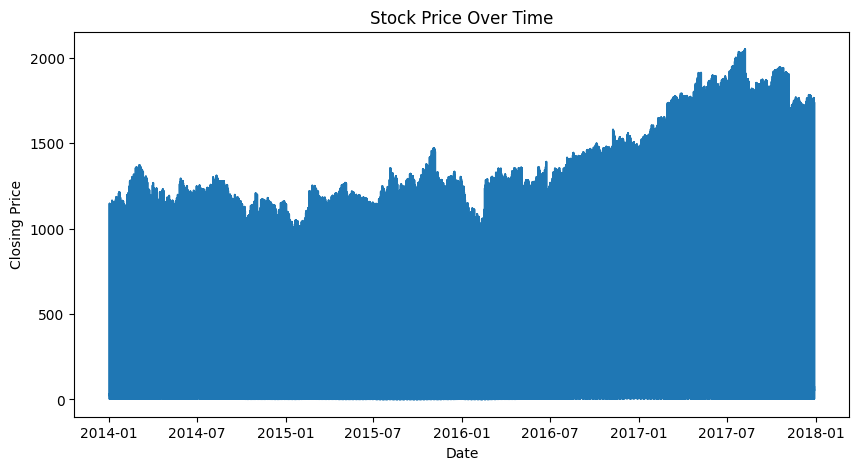

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
plt.tight_layout()

In [115]:
df['MA_7'] = df['close'].rolling(window=7).mean()
df.head(10)

,symbol,date,open,high,low,close,volume,MA_7
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,NaN
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,NaN
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,NaN
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,NaN
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,NaN
5,ABT,2014-01-02,38.0900,38.4000,38.0000,38.2300,4967472,NaN
6,ACN,2014-01-02,81.5000,81.9200,81.0900,81.1300,2405384,65.049786
7,ADBE,2014-01-02,59.0600,59.5300,58.9400,59.2900,2746370,69.896929
8,ADI,2014-01-02,49.5200,49.7500,49.0400,49.2800,2799092,65.648571
9,ADM,2014-01-02,43.2200,43.2900,42.7900,42.9900,2753765,56.112857


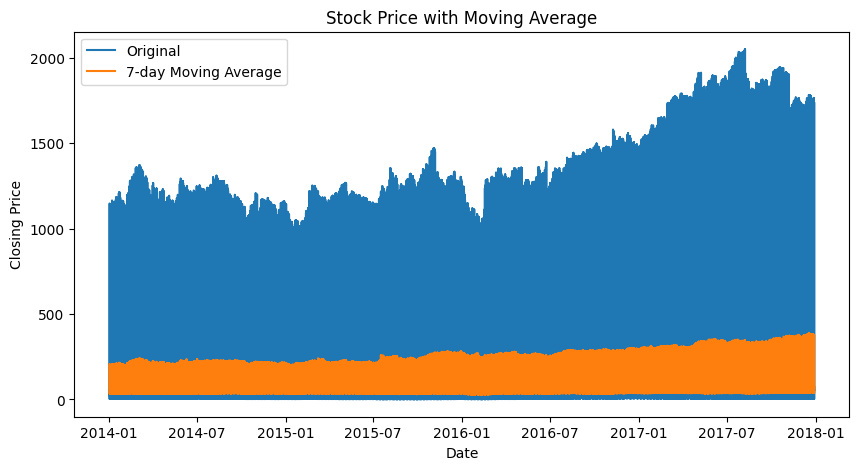

<Figure size 640x480 with 0 Axes>

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['close'], label='Original')
plt.plot(df['date'], df['MA_7'], label='7-day Moving Average')
plt.title('Stock Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
plt.tight_layout()

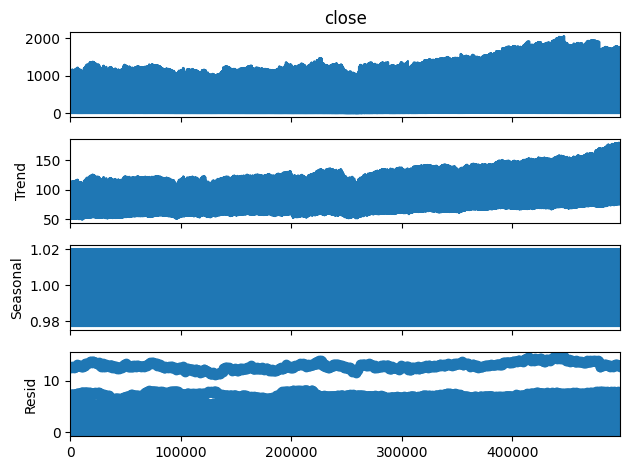

<Figure size 640x480 with 0 Axes>

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['close'], model='multiplicative', period=30)
result.plot()
plt.show()
plt.tight_layout()

In [118]:
df1 = df.drop(columns=['symbol','date'])

In [119]:
df1.corr()

,open,high,low,close,volume,MA_7
open,1.000000,0.999941,0.999927,0.999856,-0.148724,0.364354
high,0.999941,1.000000,0.999905,0.999918,-0.148344,0.364215
low,0.999927,0.999905,1.000000,0.999922,-0.149284,0.364589
close,0.999856,0.999918,0.999922,1.000000,-0.148839,0.364439
volume,-0.148724,-0.148344,-0.149284,-0.148839,1.000000,-0.031414
MA_7,0.364354,0.364215,0.364589,0.364439,-0.031414,1.000000


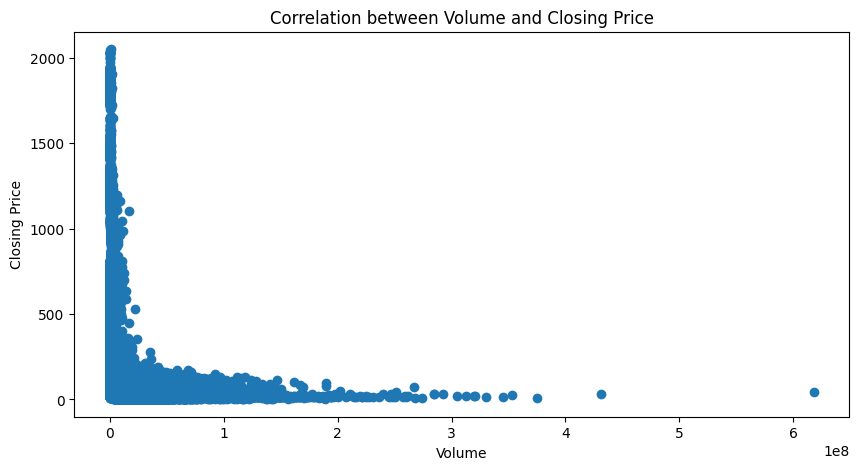

In [120]:
plt.figure(figsize=(10, 5))
plt.scatter(df1['volume'], df1['close'])
plt.title('Correlation between Volume and Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

In [121]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['close'], order=(1, 1, 1))
fit_model = model.fit()

In [122]:
forecast = fit_model.predict(start=len(df), end=len(df)+1)

In [123]:
forecast

497472    103.830322
497473    105.879560
Name: predicted_mean, dtype: float64